# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely.

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Visualizing the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

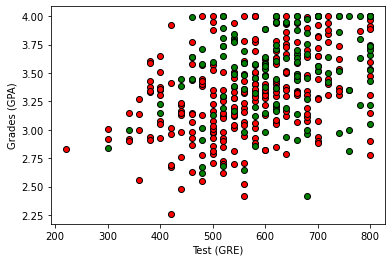

In [2]:
# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[y==1]
    rejected = X[y==0]
    plt.scatter(rejected[:,0], rejected[:,1], color = 'red', edgecolor = 'k')
    plt.scatter(admitted[:,0], admitted[:,1], color = 'green', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

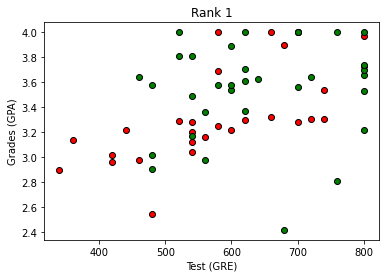

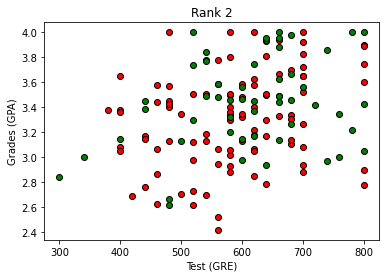

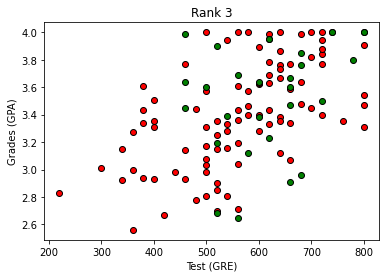

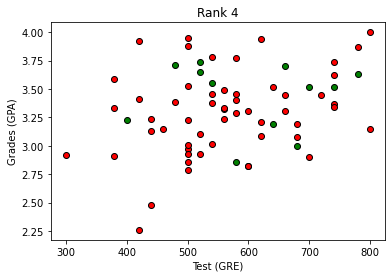

In [3]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## One-hot encoding the rank

In [4]:
# Make dummy variables for rank and concat existing columns
one_hot_data = pd.concat([data,pd.get_dummies(data["rank"], prefix="rank")], axis = 1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop("rank", axis = 1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Scaling the data
We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [5]:
# Making a copy of our data
processed_data = one_hot_data[:]

# Scale the columns
processed_data['gre'] = processed_data['gre'] / 800
processed_data['gpa'] = processed_data['gpa'] / 4.0

# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [6]:
X = processed_data.drop('admit', axis = 1)
y = processed_data['admit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

print("Number of training samples is", len(X_train))
print("Number of testing samples is", len(X_test))
print(X_train[:10])
print(X_test[:10])

Number of training samples is 360
Number of testing samples is 40
       gre     gpa  rank_1  rank_2  rank_3  rank_4
381  0.675  0.8725       0       1       0       0
55   0.925  1.0000       0       0       1       0
76   0.700  0.8400       0       0       1       0
25   1.000  0.9150       1       0       0       0
82   0.625  0.6775       0       1       0       0
382  0.675  0.8775       0       1       0       0
148  0.600  0.7275       1       0       0       0
181  0.625  0.9700       0       0       0       1
22   0.750  0.7050       0       0       0       1
173  1.000  0.8575       0       1       0       0
       gre     gpa  rank_1  rank_2  rank_3  rank_4
209  0.725  0.8750       0       1       0       0
280  0.825  0.9850       0       1       0       0
33   1.000  1.0000       0       0       1       0
210  0.925  0.8350       0       0       0       1
93   0.725  0.7325       0       1       0       0
84   0.625  0.9000       0       0       1       0
329  0.625  0.73

## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [7]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagate the error


In [8]:
# The error term formula
def error_term_formula(x, y, output):
    error = y - output
    error_term = error * sigmoid_prime(x) 
    return error_term

In [9]:
#Train the model

def train_nn(features, targets, epochs, learnrate):
    np.random.seed(42)
    m_samples, n_features = features.shape
    last_loss = None 
    weights = np.random.normal(scale = 1/n_features**0.5, size = n_features)
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x,y in zip(features.values, targets):
            yhat = sigmoid(np.dot(x, weights))
            error_term = error_term_formula(x, y, yhat)
            del_w += error_term * x           
            
        weights += learnrate * del_w / m_samples
        
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(out - targets)**2
            bin_out = np.where(out > 0.5, 1, 0)
            
            print("Epoch..: ", e)
            if last_loss and last_loss < loss:
                print("WARNING: Training Loss is increasing...")
            else:
                print("Training Loss: ", loss)
                
            last_loss = loss
            print("Training Accuracy: ", accuracy_score(targets, bin_out))
    print("Finished Training")
    return weights       

In [10]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

weights = train_nn(X_train, y_train, epochs, learnrate)

Epoch..:  0
Training Loss:  0.06578826354318572
Training Accuracy:  0.5722222222222222
Epoch..:  100
Training Loss:  0.00016279831036237195
Training Accuracy:  0.6861111111111111
Epoch..:  200
Training Loss:  5.704525268925307e-05
Training Accuracy:  0.6805555555555556
Epoch..:  300
Training Loss:  5.5451720041257096e-05
Training Accuracy:  0.6666666666666666
Epoch..:  400
Training Loss:  5.4769183470509615e-05
Training Accuracy:  0.6833333333333333
Epoch..:  500
Training Loss:  5.3640421495199754e-05
Training Accuracy:  0.6944444444444444
Epoch..:  600
Training Loss:  5.236937640685181e-05
Training Accuracy:  0.7
Epoch..:  700
Training Loss:  5.111081545180934e-05
Training Accuracy:  0.7
Epoch..:  800
Training Loss:  4.992675105516825e-05
Training Accuracy:  0.7
Epoch..:  900
Training Loss:  4.8836166465685255e-05
Training Accuracy:  0.7
Finished Training


## Calculating the Accuracy on the Test Data

In [11]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(X_test, weights))
predictions = test_out > 0.5
accuracy = accuracy_score(y_test, predictions)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.650
